# Shark Attacks
### Data Cleaning and Manipulation with Pandas

## Libraries

In [1]:
import re
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

## Code

In [2]:
# Eliminar límite de display columns
pd.set_option('display.max_columns', None)

### Paso 1 - Carga
Para empezar, cargamos el documento y hacemos un primer análisis

In [3]:
attacks = pd.read_csv('./attacks.csv', encoding='latin-1', parse_dates=True)

In [4]:
attacks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [5]:
attacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [6]:
attacks.shape

(25723, 24)

### Paso 2 - Primera limpieza
Se eliminan:
- Espacios sobrantes de los títulos de las columnas
- Filas duplicadas
- Columnas con todo valores nulos
- Filas con 2 o más columnas las cuales tengan todo valores nulos

In [7]:
attacks.rename(columns=lambda x: re.sub('^\s*|\s*$','',x), inplace=True)
attacks.drop_duplicates(inplace=True)
attacks.dropna(axis=1, how='all', inplace=True)
attacks.dropna(axis=0, how='all', thresh=2, inplace=True)

In [8]:
attacks.isna().sum()

Case Number                  1
Date                         7
Year                         9
Type                        11
Country                     57
Area                       462
Location                   547
Activity                   551
Name                       217
Sex                        572
Age                       2838
Injury                      35
Fatal (Y/N)                546
Time                      3361
Species                   2845
Investigator or Source      24
pdf                          7
href formula                 8
href                         7
Case Number.1                7
Case Number.2                7
original order               0
Unnamed: 22               6308
Unnamed: 23               6307
dtype: int64

### Paso 3 - Análisis por columnas

#### 'Year'
Los datos de años anteriores a 1700 pueden no ser del todo fiables, por lo que decido eliminarlos del DataFrame. Para ello:
- Relleno los valores nulos con 0 y los convierto a `int`
- Elimino los años anteriores a 1700

In [9]:
attacks['Year'] = attacks['Year'].fillna(0).astype('int')
attacks = attacks[attacks['Year'] >= 1700]

#### 'Case Number'

Esta columna contiene mayoritariamente fechas, pero con formato erróneo y algunas incorrectas.

Asumo que todas las columnas relativas a fechas han extraído las fechas de la columna `pdf`, por lo que esta debería contener la fecha correcta.

In [10]:
# Extraer la fecha del fichero pdf

pdf_dates = re.compile('\d{4}\W\d{2}\W\d{2}')

In [11]:
# Buscar fechas con ese formato en la columna de 'pdf'

pdf_dates_clean = attacks['pdf'].str.findall(pdf_dates).str.join('')

In [12]:
# Reemplazar fechas correctas en la columna de 'Case Number'

attacks['Case Number'] = pdf_dates_clean

In [13]:
# Crear subset con las columnas de fechas

dates = attacks[['Case Number', 'Date', 'Year', 'pdf']]
dates.head()

,Case Number,Date,Year,pdf
0,2018.06.25,25-Jun-2018,2018,2018.06.25-Wolfe.pdf
1,2018.06.18,18-Jun-2018,2018,2018.06.18-McNeely.pdf
2,2018.06.09,09-Jun-2018,2018,2018.06.09-Denges.pdf
3,2018.06.08,08-Jun-2018,2018,2018.06.08-Arrawarra.pdf
4,2018.06.04,04-Jun-2018,2018,2018.06.04-Ramos.pdf


In [14]:
# Reemplazar los .00 por .01

attacks['Case Number'].replace(to_replace='(\.+[0]{2})', value='.01', regex=True, inplace=True)

In [15]:
# Convertir 'Case Number' a tipo fecha

attacks['Case Number'] = pd.to_datetime(attacks['Case Number'], errors='coerce').dt.strftime('%Y-%m-%d')

In [16]:
attacks[attacks['Case Number'].isnull()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1046,NaN,01-Feb-2010,2010,Provoked,NEW ZEALAND,South Island,Oreti Beach,Boogie Boarding,Lydia Ward,F,14,Stepped on shark PROVOKED INCIDENT,N,18h30,1.5 m shark,"R.D. Weeks, GSAF; K. Ritchie, ABC News, 2/1/...",12.26,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2010.02.01,2010.02.01,5257.0,NaN,NaN
5121,NaN,03-Nov-1927,1927,Sea Disaster,AUSTRALIA,New South Wales,"Bradleys Head, Sydney",The steamer Tahiti collided with the ferry Gre...,NaN,NaN,NaN,40 people perished,Y,NaN,NaN,"Oakland Tribune, 8/16/1930",1927.11.0-Tahiti-diaster.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1927.11.03,1927.11.03,1182.0,NaN,NaN
5123,NaN,12-Oct-1927,1927,Unprovoked,AUSTRALIA,New South Wales,"Kiah Creek, Eden",Riding horseback across the creek,Norman Severs & horse,M,NaN,No injury to man or horse,N,NaN,NaN,"Advertiser, 10/14/1927; V.M. Coppleson (1933);...",1927.10-12-Severs-horse.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1927.10.12,1927.10.12,1180.0,NaN,NaN


In [17]:
# Para los valores nulos, igualar a la fecha de la columna 'Date'

attacks['Case Number'].fillna(attacks['Date'], inplace=True)

In [18]:
attacks['Case Number'] = pd.to_datetime(attacks['Case Number'], errors='coerce').dt.strftime('%Y-%m-%d')

In [19]:
attacks[attacks['Case Number'].isnull()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23


In [20]:
# Eliminar la columna 'Date'

attacks.drop(axis=1, columns=['Date'], inplace=True)

In [21]:
# Renombrar 'Case Number' por 'Date'

attacks.rename(columns={'Case Number': 'Date'}, inplace=True)

In [22]:
attacks.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018-06-08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018-06-04,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


#### 'Type'

In [23]:
attacks['Type'].value_counts()

Unprovoked      4474
Provoked         567
Invalid          543
Sea Disaster     233
Boating          203
Boat             135
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [24]:
attacks['Type'].replace(to_replace='Boat\w*', value='Boating', regex=True, inplace=True)

In [25]:
attacks['Type'].replace(to_replace='Questionable', value='Unknown', regex=True, inplace=True)

In [26]:
attacks['Type'].fillna('Unknown', inplace=True)

In [27]:
attacks['Type'].value_counts()

Unprovoked      4474
Provoked         567
Invalid          543
Boating          339
Sea Disaster     233
Unknown            6
Name: Type, dtype: int64

In [28]:
attacks['Country'].sort_values().unique()

array([' PHILIPPINES', ' TONGA', 'ADMIRALTY ISLANDS', 'AFRICA', 'ALGERIA',
       'AMERICAN SAMOA', 'ANDAMAN / NICOBAR ISLANDAS', 'ANDAMAN ISLANDS',
       'ANGOLA', 'ANTIGUA', 'ARGENTINA', 'ARUBA', 'ATLANTIC OCEAN',
       'AUSTRALIA', 'AZORES', 'BAHAMAS', 'BANGLADESH', 'BARBADOS',
       'BAY OF BENGAL', 'BELIZE', 'BERMUDA', 'BRAZIL', 'BRITISH ISLES',
       'BRITISH NEW GUINEA', 'BRITISH VIRGIN ISLANDS',
       'BRITISH WEST INDIES', 'BURMA', 'CANADA', 'CAPE VERDE',
       'CARIBBEAN SEA', 'CAYMAN ISLANDS', 'CENTRAL PACIFIC', 'CEYLON',
       'CHILE', 'CHINA', 'COLUMBIA', 'COMOROS', 'COOK ISLANDS',
       'COSTA RICA', 'CRETE', 'CROATIA', 'CUBA', 'CURACAO', 'CYPRUS',
       'Coast of AFRICA', 'DIEGO GARCIA', 'DOMINICAN REPUBLIC', 'ECUADOR',
       'EGYPT', 'EGYPT ', 'EGYPT / ISRAEL', 'EL SALVADOR', 'ENGLAND',
       'EQUATORIAL GUINEA / CAMEROON', 'FALKLAND ISLANDS',
       'FEDERATED STATES OF MICRONESIA', 'FIJI', 'FRANCE',
       'FRENCH POLYNESIA', 'Fiji', 'GABON', 'GEORGIA', 'GH

#### 'Country'

In [29]:
# Convertir todo a mayúsculas

attacks['Country'] = attacks['Country'].str.upper() 

In [30]:
# Eliminar espacios al principio y limpiar países

attacks['Country'].replace(to_replace='^\s*|\s*$|\s*\/\s*\w+|\?$|(?<=HELENA)(.*)|(?<=EMIRATES)(.*)|(.*)(?=AFRICA)|(.*)(?=MICRONESIA)|^MID\W+', value='', regex=True, inplace=True)

In [31]:
attacks['Country'].replace(to_replace='ISLANDAS', value='ISLANDS', regex=True, inplace=True)

In [32]:
attacks['Country'].replace(to_replace='MALDIVE ISLANDS', value='MALDIVES', regex=True, inplace=True)

In [33]:
attacks['Country'].replace(to_replace='RED SEA$', value='RED SEA OCEAN', regex=True, inplace=True)

In [34]:
attacks['Country'].replace(to_replace='REUNION$', value='REUNION ISLAND', regex=True, inplace=True)

In [35]:
attacks['Country'].replace(to_replace='PACIFC', value='PACIFIC', regex=True, inplace=True)

In [36]:
attacks['Country'].replace(to_replace='^ST\s+', value='ST. ', regex=True, inplace=True)

In [37]:
attacks['Country'].replace(to_replace='MAARTIN$', value='MARTIN', regex=True, inplace=True)

In [38]:
attacks['Country'].fillna('UNKNOWN', inplace=True)

In [39]:
attacks['Country'] = attacks['Country'].str.title() 

In [40]:
attacks['Country'].replace(to_replace='Usa', value='USA', regex=True, inplace=True)

In [41]:
attacks['Country'].sort_values().unique()

array(['Admiralty Islands', 'Africa', 'Algeria', 'American Samoa',
       'Andaman Islands', 'Angola', 'Antigua', 'Argentina', 'Aruba',
       'Atlantic Ocean', 'Australia', 'Azores', 'Bahamas', 'Bangladesh',
       'Barbados', 'Bay Of Bengal', 'Belize', 'Bermuda', 'Brazil',
       'British Isles', 'British New Guinea', 'British Virgin Islands',
       'British West Indies', 'Burma', 'Canada', 'Cape Verde',
       'Caribbean Sea', 'Cayman Islands', 'Central Pacific', 'Ceylon',
       'Chile', 'China', 'Columbia', 'Comoros', 'Cook Islands',
       'Costa Rica', 'Crete', 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Diego Garcia', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Falkland Islands',
       'Fiji', 'France', 'French Polynesia', 'Gabon', 'Georgia', 'Ghana',
       'Grand Cayman', 'Greece', 'Greenland', 'Grenada', 'Guam',
       'Guatemala', 'Guinea', 'Gulf Of Aden', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong', 'Iceland'

#### 'Area' y 'Location'

Al tener muchos datos sucios, he decidido mantenerlas en el DataFrame pero no limpiarlas.

In [42]:
# Limpiar espacios innecesarios

attacks['Area'].replace(to_replace='^\s*|\s{2,}|\s*$', value='', regex=True, inplace=True)
attacks['Area'] = attacks['Area'].fillna('Unknown')

In [43]:
# Limpiar espacios innecesarios

attacks['Location'].replace(to_replace='^\s*|\s{2,}|\s*$', value='', regex=True, inplace=True)
attacks['Location'] = attacks['Location'].fillna('Unknown')

#### 'Activity'

In [44]:
attacks['Activity'] = attacks['Activity'].str.title()

In [45]:
attacks['Activity'].value_counts().head(20)

Surfing            970
Swimming           852
Fishing            423
Spearfishing       332
Bathing            159
Wading             146
Diving             115
Standing            97
Scuba Diving        89
Snorkeling          88
Body Boarding       64
Body Surfing        49
Swimming            46
Boogie Boarding     45
Kayaking            33
Treading Water      32
Fell Overboard      32
Free Diving         27
Pearl Diving        27
Windsurfing         19
Name: Activity, dtype: int64

In [46]:
attacks['Activity'].isnull().sum()

521

In [47]:
attacks['Activity'].fillna('Unknown', inplace=True)

In [48]:
attacks['Activity'].replace(to_replace='^\s*|\s{2,}|\s*$', value='', regex=True, inplace=True)

In [49]:
# Decido centrarme en las 20 actividades con más casos de ataques de tiburones.
# Considero que solo esas son las relevantes, todo el resto son desconocidas.

attacks['Activity'].value_counts().nlargest(20).index.to_list()

['Surfing',
 'Swimming',
 'Unknown',
 'Fishing',
 'Spearfishing',
 'Bathing',
 'Wading',
 'Diving',
 'Standing',
 'Scuba Diving',
 'Snorkeling',
 'Body Boarding',
 'Body Surfing',
 'Boogie Boarding',
 'Kayaking',
 'Fell Overboard',
 'Treading Water',
 'Free Diving',
 'Pearl Diving',
 'Surf Skiing']

In [50]:
# Quitar 'Unknown'

activities = ['Surfing', 'Swimming', 'Fishing', 'Spearfishing', 'Bathing', 'Wading', 'Diving', 'Standing', 'Scuba Diving', 'Snorkeling', 'Body Boarding', 'Body Surfing', 'Boogie Boarding', 'Kayaking', 'Fell Overboard', 'Treading Water', 'Free Diving', 'Pearl Diving', 'Windsurfing']

In [51]:
attacks['Activity'] = attacks['Activity'].apply(lambda x: x if x in activities else 'Unknown')

In [52]:
attacks['Activity'].value_counts()

Unknown            2481
Surfing             975
Swimming            898
Fishing             436
Spearfishing        335
Bathing             162
Wading              146
Diving              118
Standing             99
Scuba Diving         90
Snorkeling           88
Body Boarding        65
Body Surfing         50
Boogie Boarding      45
Kayaking             35
Fell Overboard       33
Treading Water       32
Free Diving          28
Pearl Diving         27
Windsurfing          19
Name: Activity, dtype: int64

#### 'Species'

In [53]:
attacks['Species'].value_counts().head(20)

White shark                                           162
Shark involvement prior to death was not confirmed    105
Invalid                                               101
Shark involvement not confirmed                        88
Tiger shark                                            70
Shark involvement prior to death unconfirmed           68
Bull shark                                             47
4' shark                                               40
6' shark                                               39
Questionable incident                                  35
1.8 m [6'] shark                                       33
1.5 m [5'] shark                                       32
Questionable                                           32
3' shark                                               26
5' shark                                               26
1.2 m [4'] shark                                       26
2 m shark                                              25
4' to 5' shark

In [54]:
attacks['Species'].replace(to_replace='^\s*|\s{2,}|\s*$', value='', regex=True, inplace=True)
attacks['Species'].fillna('Unknown', inplace=True)

In [55]:
clean_species = attacks['Species'].str.findall('((?:\w{3,} )?[s|S]hark)').str.join('').str.title()

In [56]:
attacks.columns.get_loc('Species')

13

In [57]:
# Creo una nueva columna con el formato correcto, elimino la antigua columna 'Species' y renombro la nueva

attacks.insert(loc=14, column='Clean Species', value=clean_species)
attacks.drop(axis=1, columns=['Species'], inplace=True)
attacks.rename(columns={'Clean Species': 'Species'}, inplace=True)

In [58]:
attacks['Species'].fillna('Unknown', inplace=True)

In [59]:
attacks['Species'].value_counts()

                                                 2970
Shark                                            1219
White Shark                                       615
Tiger Shark                                       252
Bull Shark                                        160
                                                 ... 
Whiptail Sharkthresher Shark                        1
Whitetip Sharkblue Sharktiger Sharkbull Shark       1
Sharktiger Shark                                    1
Metre Shark                                         1
White Sharkbelieved Shark                           1
Name: Species, Length: 140, dtype: int64

In [60]:
attacks['Species'].isnull().sum()

0

#### 'Name'

- A pesar de no ser una información relevante para el análisis, esta columna nos sirve para rellenar aquellas filas que no tienen un sexo asignado en la columna 'Sex'
- Cuando tengo la información, elimino la columna

In [61]:
attacks[attacks['Sex'].isna()][attacks['Name'].isin(['male','female'])].head(30)

<ipython-input-61-9a98b7724495>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  attacks[attacks['Sex'].isna()][attacks['Name'].isin(['male','female'])].head(30)


,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
2225,1997-09-08,1997,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,NaN,17,2 small lacerations to bottom of foot,N,Evening,Blacktip Shark,"Daytona News-Journal, 9/9/1997",1997.09.08-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1997.09.08,1997.09.08,4078.0,NaN,NaN
3049,1980-12-26,1980,Invalid,Africa,Eastern Cape Province,Port Elizabeth,Unknown,male,NaN,NaN,Probable drowning & scavenging,NaN,NaN,Shark,"Eastern Province Herald, 12/29/1980",1980.12.26-scavenging.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1980.12.26,1980.12.26,3254.0,NaN,NaN
3452,1968-11-04,1968,Sea Disaster,Papua New Guinea,Madang Province,Unknown,Unknown,male,NaN,NaN,Remains recovered days later from shark,NaN,NaN,Shark,"The Sydney Morning Herald, 11/9/1968",1968.11.04-StormKing.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1968.11.04,1968.11.04,2851.0,NaN,NaN
4338,1954-07-01,1954,Invalid,Croatia,Unknown,Pula,Unknown,male,NaN,NaN,Human remains found in shark,NaN,NaN,Shark,"C. Moore, GSAF",1954.07.01.R-Pula.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1954.07.01.R,1954.07.01.R,1965.0,NaN,NaN
4467,1950-07-19,1950,Provoked,Italy,Savona,Albenga,Fishing,male,NaN,NaN,Harpooned shark bit his forehead PROVOKED INCI...,N,NaN,,"C. Moore, GSAF",1950.07.19-Albenga.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1950.07.19,1950.07.19,1836.0,NaN,NaN
6062,1842-07-06,1842,Provoked,USA,New Jersey,"Absecon, Atlantic County",Unknown,male,NaN,NaN,Lacerations to leg PROVOKED INCIDENT,N,NaN,,"New York Evening Post, 7/11/1842",1842.07.06-Absecon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1842.07.06,1842.07.06,241.0,NaN,NaN
6108,1823-12-30,1823,Invalid,Jamaica,Unknown,Unknown,Unknown,male,NaN,NaN,Human remains found in shark,NaN,NaN,Shark,NaN,1823.12.30.R-Jamaica.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1823.12.30.R,1823.12.30.R,195.0,NaN,NaN


In [62]:
attacks[attacks['Sex'].isna()][attacks['Name'].isin(['male','female'])].index

<ipython-input-62-a90c40b46ede>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  attacks[attacks['Sex'].isna()][attacks['Name'].isin(['male','female'])].index


Int64Index([2225, 3049, 3452, 4338, 4467, 6062, 6108], dtype='int64')

In [63]:
attacks.loc[attacks[attacks['Sex'].isna()][attacks['Name'].isin(['male','female'])].index,'Sex'] = attacks[attacks['Sex'].isna()][attacks['Name'].isin(['male','female'])]

<ipython-input-63-c480fef38f5f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  attacks.loc[attacks[attacks['Sex'].isna()][attacks['Name'].isin(['male','female'])].index,'Sex'] = attacks[attacks['Sex'].isna()][attacks['Name'].isin(['male','female'])]


In [64]:
attacks.drop(axis=1, columns=['Name'], inplace=True)

#### 'Sex'

In [65]:
attacks['Sex'].value_counts()

M      4977
F       624
N         2
M         2
lli       1
.         1
Name: Sex, dtype: int64

In [66]:
attacks['Sex'].replace(to_replace='^\s*|\s*$', value='', regex=True, inplace=True)
attacks['Sex'].replace(to_replace='N', value='M', regex=True, inplace=True)
attacks['Sex'].replace(to_replace='^\.|lli$', value='Unknown', regex=True, inplace=True)
attacks['Sex'].fillna('Unknown', inplace=True)

#### 'Injury'

No es relevante para el análisis. La eliminamos.

In [67]:
attacks.drop(axis=1, columns=['Injury'], inplace=True)

#### 'Fatal (Y/N)'

In [68]:
attacks['Fatal (Y/N)'].value_counts()

N          4227
Y          1324
UNKNOWN      64
 N            7
M             1
N             1
2017          1
y             1
Name: Fatal (Y/N), dtype: int64

In [69]:
attacks['Fatal (Y/N)'] = attacks['Fatal (Y/N)'].str.upper()
attacks['Fatal (Y/N)'].replace(to_replace='^\s*|\s{2,}|\s*$', value='', regex=True, inplace=True)
attacks['Fatal (Y/N)'].replace(to_replace='^M$', value='N', regex=True, inplace=True)
attacks['Fatal (Y/N)'].replace(to_replace='^\d+$', value='Unknown', regex=True, inplace=True)
attacks['Fatal (Y/N)'].fillna('Unknown', inplace=True)
attacks['Fatal (Y/N)'] = attacks['Fatal (Y/N)'].str.title()

### Paso 4 - Eliminar datos innecesarios

Tras hacer la limpieza, decido:
- Eliminar las columnas a las que les falta el 60% de los datos
- Eliminar las últimas 7 columnas

print(attacks.columns)
print(len(attacks.columns))

In [70]:
attacks.dropna(axis=1, thresh=attacks.shape[0]*0.6, inplace=True)
attacks.drop(attacks.columns[-7:], axis=1, inplace=True)

In [71]:
print(attacks.columns)
print(len(attacks.columns))

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Sex', 'Fatal (Y/N)', 'Species'],
      dtype='object')
10


### Paso 5 - Index

Ya como último paso, decido setear el país como index para poder basar mi análisis en esta información

In [72]:
attacks.set_index('Country', inplace=True)
attacks.head(11)

,Date,Year,Type,Area,Location,Activity,Sex,Fatal (Y/N),Species
Country,,,,,,,,,
USA,2018-06-25,2018,Boating,California,"Oceanside, San Diego County",Unknown,F,N,White Shark
USA,2018-06-18,2018,Unprovoked,Georgia,"St. Simon Island, Glynn County",Standing,F,N,
USA,2018-06-09,2018,Invalid,Hawaii,"Habush, Oahu",Surfing,M,N,
Australia,2018-06-08,2018,Unprovoked,New South Wales,Arrawarra Headland,Surfing,M,N,Shark
Mexico,2018-06-04,2018,Provoked,Colima,La Ticla,Free Diving,M,N,Tiger Shark
Australia,2018-06-03,2018,Unprovoked,New South Wales,"Flat Rock, Ballina",Unknown,M,N,
Brazil,2018-06-03,2018,Unprovoked,Pernambuco,"Piedade Beach, Recife",Swimming,M,Y,Tiger Shark
USA,2018-05-27,2018,Unprovoked,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,N,Lemon Shark
USA,2018-05-26,2018,Unprovoked,Florida,"Cocoa Beach, BrevardCounty",Unknown,M,N,Bull Shark


In [73]:
attacks.isnull().sum()

Date           0
Year           0
Type           0
Area           0
Location       0
Activity       0
Sex            0
Fatal (Y/N)    0
Species        0
dtype: int64

### Paso 6 - Export

In [74]:
attacks.to_csv('attacks-clean.csv', sep=',', index=False)

## Analysis

In [75]:
attacks.reset_index(inplace=True)
plt.rcParams['figure.figsize'] = (20,8)
%matplotlib inline

### Top 5 de países con más ataques

<AxesSubplot:>

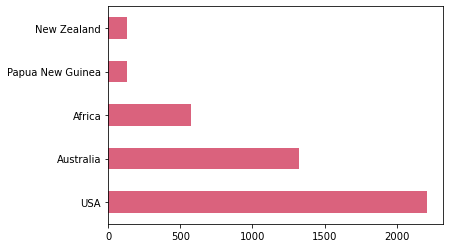

In [76]:
top5_country = attacks['Country'].value_counts().sort_values(ascending=False).head()
top5_country.plot(kind='barh', color='#DA627D')

### Top 5 de actividades más peligrosas

<AxesSubplot:>

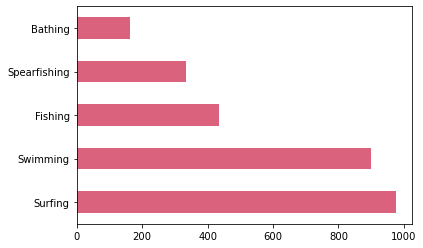

In [77]:
top5_activity = attacks.Activity[attacks['Activity'] != 'Unknown'].value_counts().sort_values(ascending=False).head()
top5_activity.plot(kind='barh', color='#DA627D')

### Sexo de las víctimas

<AxesSubplot:>

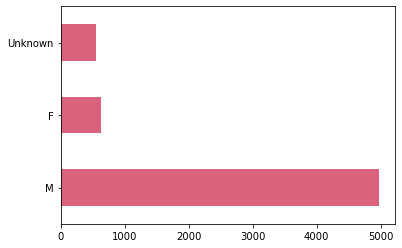

In [78]:
attacks['Sex'].value_counts().sort_values(ascending=False).plot(kind='barh', color='#DA627D')

### Mortalidad del ataque

<AxesSubplot:ylabel='Fatal (Y/N)'>

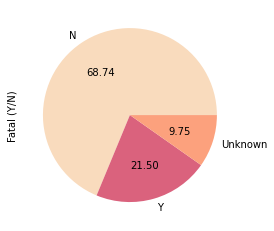

In [79]:
attacks['Fatal (Y/N)'].value_counts().sort_values(ascending=False).plot(kind='pie', colors=['#F9DBBD', '#DA627D', '#FCA17D'], autopct='%.2f')

## Conclusion

Basándonos en los datos recogidos desde 1700 hasta la actualidad, podemos concluir que:
1. Estados Unidos es el país con más ataques de tiburón reportados
2. Las personas que practican surf son las más vulnerables a sufrir un ataque de tiburón
3. La gran mayoría de las víctimas son hombres
4. Casi el 70% de los casos reportados no fueron mortales